#Installing dependencies / Libraries


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, accuracy_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import joblib

import warnings
warnings.filterwarnings("ignore")

#ML Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import lightgbm as lgb
from lightgbm import LGBMClassifier
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Dense, SimpleRNN, Input, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/My Drive/dataset/audio_dataset.xlsx'

#Reading data

In [ ]:
data = pd.read_excel(file_path)

feature_means = data.drop(columns='Label').mean().to_dict()
joblib.dump(feature_means, "feature_means.pkl")

['feature_means.pkl']

In [ ]:
print(data.columns)
len(data.columns)

Index(['Label', 'Spectral Centroid Mean', 'Spectral Bandwidth Mean',
       'RMS Mean', 'Zero-Crossing Rate Mean', 'Spectral Contrast Mean',
       'Pitch Mean', 'Pitch Confidence Mean', 'Mel Spectrogram Mean',
       'Mel Spectrogram Variance', 'Energy Mean', 'Speech rate'],
      dtype='object')


12

#Normalizing data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

X = data.drop(columns='Label')
y = data['Label']

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

joblib.dump(scaler, "scaler.pkl")

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df["Label"] = y

data = X_scaled_df

data.head()

,Spectral Centroid Mean,Spectral Bandwidth Mean,RMS Mean,Zero-Crossing Rate Mean,Spectral Contrast Mean,Pitch Mean,Pitch Confidence Mean,Mel Spectrogram Mean,Mel Spectrogram Variance,Energy Mean,Speech rate,Label
0,0.582152,0.647345,0.510649,0.412366,0.952397,0.427749,0.450634,0.272559,0.036238,0.510649,0.509612,F_AI
1,0.602602,0.646356,0.609125,0.413012,0.971727,0.348427,0.552600,0.425985,0.149744,0.609125,0.535426,F_AI
2,0.761387,0.695815,0.530113,0.619878,0.916626,0.533888,0.489299,0.289118,0.037609,0.530113,0.097650,F_AI
3,0.702820,0.655217,0.635047,0.736935,0.923766,0.818061,0.553599,0.432794,0.122097,0.635047,0.597965,F_AI
4,0.575733,0.644153,0.507514,0.355375,0.934018,0.486924,0.429817,0.280162,0.070484,0.507514,0.509612,F_AI


In [ ]:
cleaned_data = data.dropna()
data = cleaned_data
has_null = data.isnull().any().any()
print(has_null)

False


#Visualization of dataset & PCA


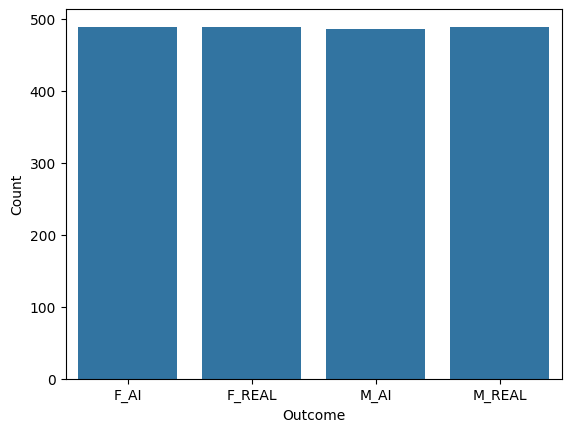

In [ ]:
sns.countplot(data=data, x="Label")
plt.ylabel("Count")
plt.xlabel("Outcome")
plt.show()

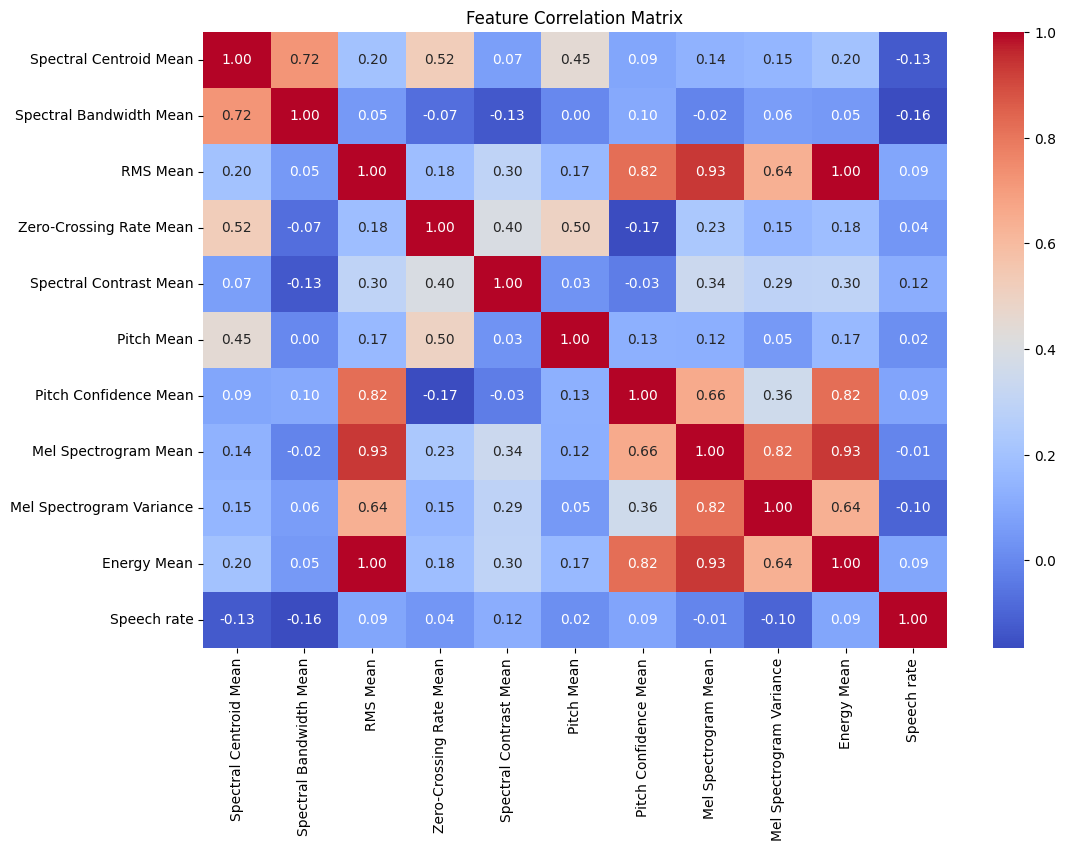

In [ ]:
correlation = data.drop(columns='Label').corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()

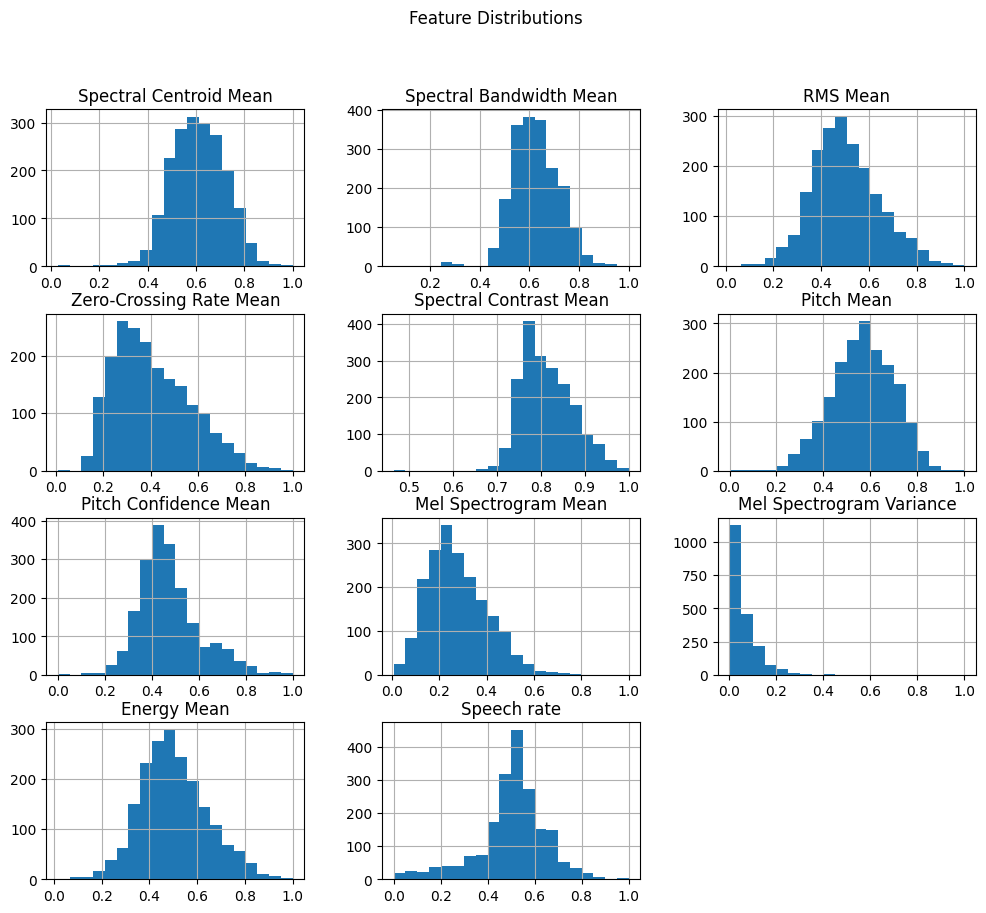

In [ ]:
data.drop(columns='Label').hist(bins=20, figsize=(12, 10))
plt.suptitle("Feature Distributions")
plt.show()

Scree Plot


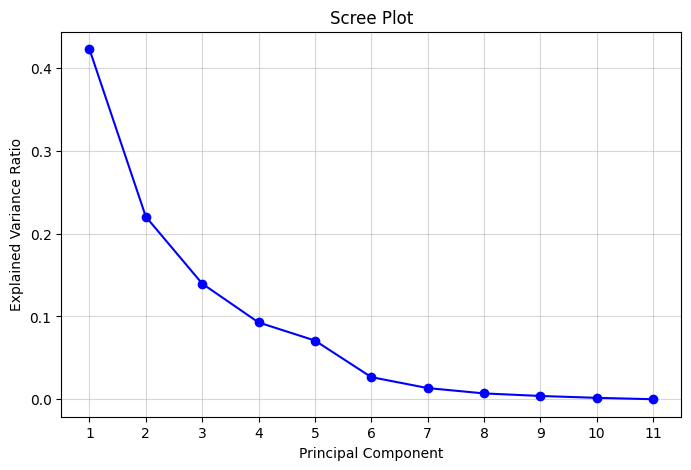


Cummulative Variance of each PC: - [0.42307206 0.64369771 0.7834231  0.8762294  0.94717028 0.97388657
 0.98736745 0.99439202 0.99833298 1.         1.        ]


In [ ]:
X = data.drop(columns='Label') #features
pca = PCA()
X_pca = pca.fit_transform(X)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

#scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', color='b')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))  # Ensure PC indices are shown
plt.grid(alpha=0.5)
plt.show()

cumulative_variance = pca.explained_variance_ratio_.cumsum()
print("\nCummulative Variance of each PC: -",cumulative_variance)


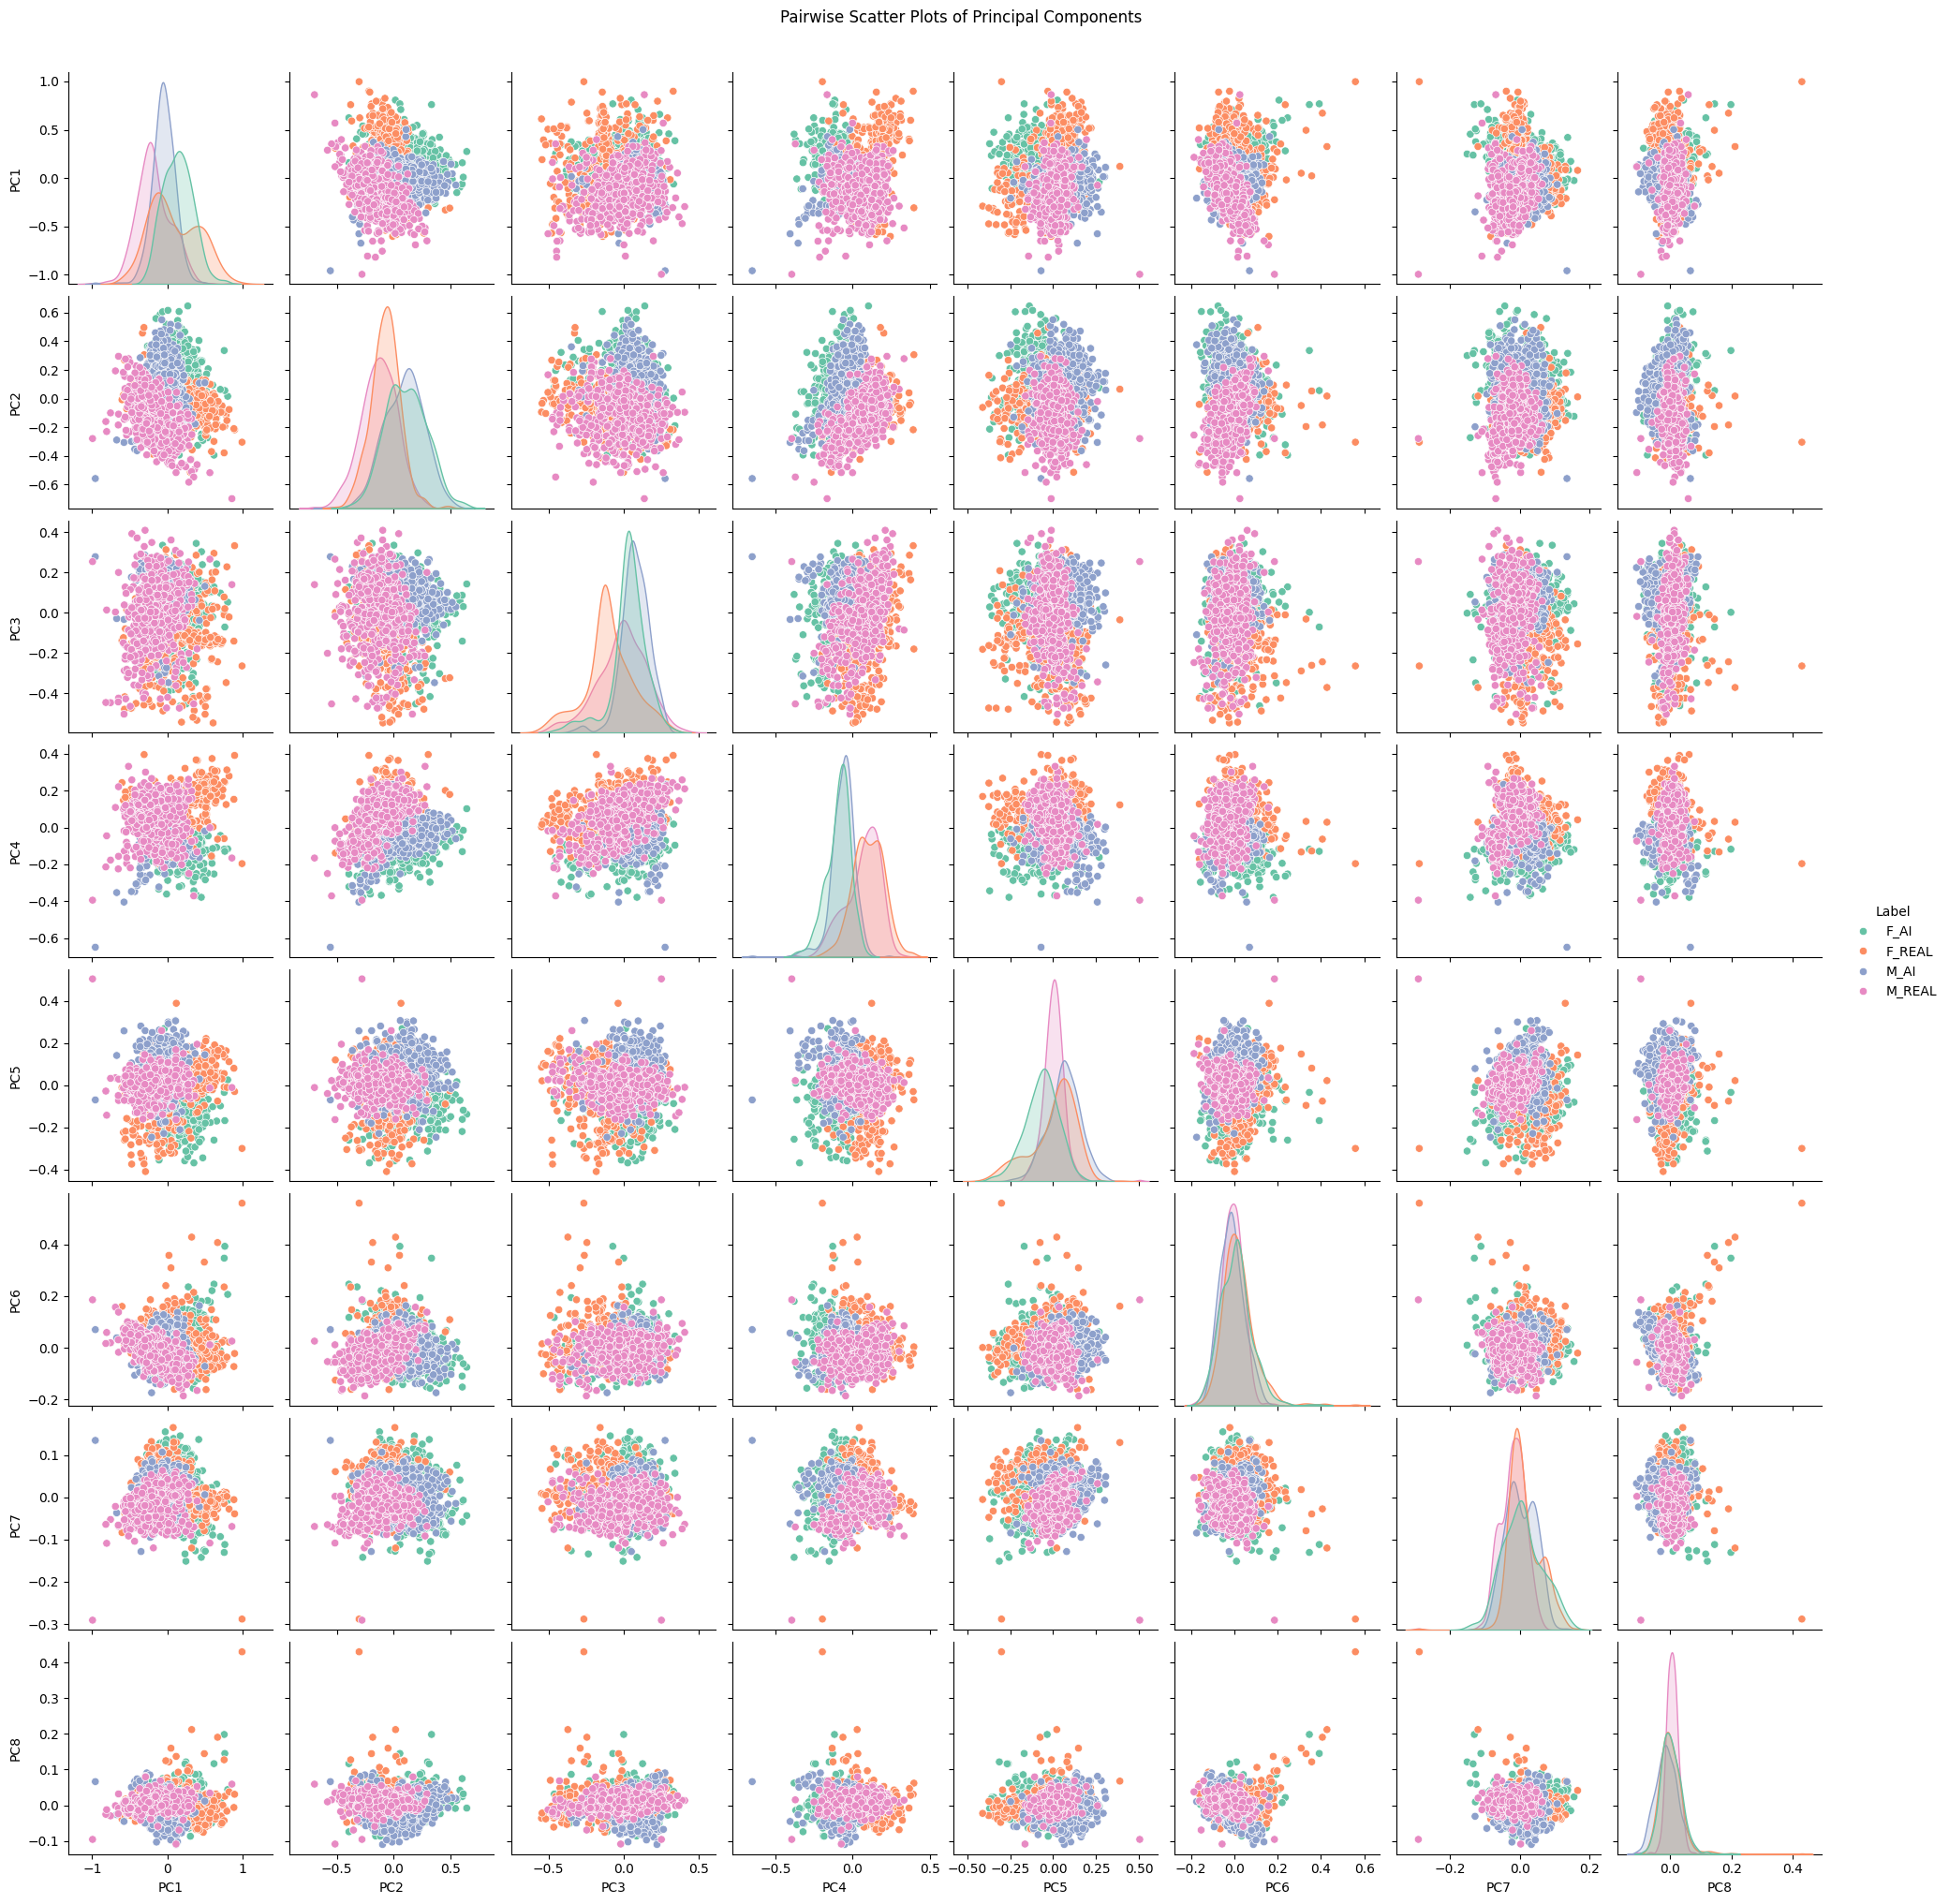

In [ ]:
X = data.drop(columns='Label')  # Features
y = data['Label']  # Labels

pca = PCA(n_components=9)
X_pca = pca.fit_transform(X)

joblib.dump(pca, 'pca_model.pkl')

# Convert the PCA results into a DataFrame for easier visualization
data_pca = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(9)])
data_pca['Label'] = y  # Add the label column back

# Pairplot to visualize pairwise combinations of PCs
sns.pairplot(data_pca, vars=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8"], hue="Label", palette="Set2")
plt.suptitle("Pairwise Scatter Plots of Principal Components", y=1.02)
plt.show()

In [ ]:
data_pca_cleaned = data_pca.dropna(axis=0, how='any')
data_pca = data_pca_cleaned
data_pca.isna().any().any()

False

#Data Split - Features and Labels

In [ ]:
X = data_pca.iloc[:, :-1]  #features
y = data_pca["Label"]   #labels

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

splits = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

model_accuracies = {}

#Running data through ML models

#KNN

In [ ]:
accuracies = []
for ratio in splits:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, random_state=2)

    n_neighbors = len(X_train)

    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Train-Test split ratio: {(1-ratio)*100:.1f}% - {ratio*100:.1f}%")
    print(f"Accuracy: {accuracy}")
    accuracies.append(accuracy)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

avg_accuracy = np.mean(accuracies)

model_accuracies["KNN"] = [avg_accuracy]

Train-Test split ratio: 90.0% - 10.0%
Accuracy: 0.22564102564102564

Classification Report:
               precision    recall  f1-score   support

        F_AI       0.23      1.00      0.37        44
      F_REAL       0.00      0.00      0.00        44
        M_AI       0.00      0.00      0.00        51
      M_REAL       0.00      0.00      0.00        56

    accuracy                           0.23       195
   macro avg       0.06      0.25      0.09       195
weighted avg       0.05      0.23      0.08       195

Train-Test split ratio: 80.0% - 20.0%
Accuracy: 0.2230769230769231

Classification Report:
               precision    recall  f1-score   support

        F_AI       0.00      0.00      0.00        98
      F_REAL       0.22      1.00      0.36        87
        M_AI       0.00      0.00      0.00        97
      M_REAL       0.00      0.00      0.00       108

    accuracy                           0.22       390
   macro avg       0.06      0.25      0.09       390


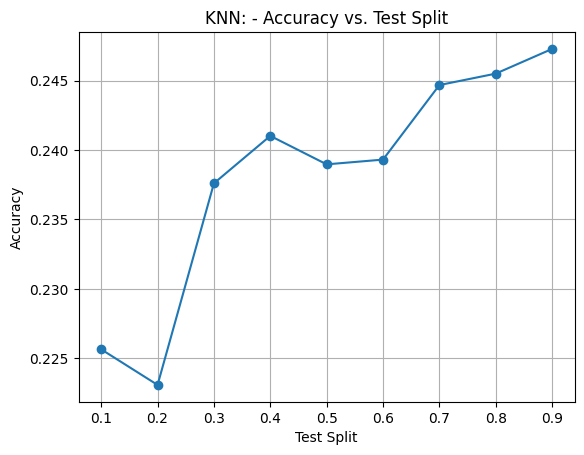

In [ ]:
plt.plot(splits, accuracies, marker='o')
plt.xlabel('Test Split')
plt.ylabel('Accuracy')
plt.title('KNN: - Accuracy vs. Test Split')
plt.grid(True)
plt.show()

#Gaussian Naive Bayes

In [ ]:
accuracies = []
for test_split_ratio in splits:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_split_ratio, random_state=2)

  model = GaussianNB()
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  print(f"Train-Test split ratio: {(1-test_split_ratio)*100:.1f}% - {test_split_ratio*100:.1f}%")
  print(f"Accuracy: {accuracy}")
  accuracies.append(accuracy)
  print("\nClassification Report:\n", classification_report(y_test, y_pred))

avg_accuracy = np.mean(accuracies)

model_accuracies["Gausian NB"] = [avg_accuracy]

Train-Test split ratio: 90.0% - 10.0%
Accuracy: 0.8102564102564103

Classification Report:
               precision    recall  f1-score   support

        F_AI       0.84      0.70      0.77        44
      F_REAL       0.82      0.75      0.79        44
        M_AI       0.71      0.86      0.78        51
      M_REAL       0.89      0.89      0.89        56

    accuracy                           0.81       195
   macro avg       0.82      0.80      0.81       195
weighted avg       0.82      0.81      0.81       195

Train-Test split ratio: 80.0% - 20.0%
Accuracy: 0.8461538461538461

Classification Report:
               precision    recall  f1-score   support

        F_AI       0.84      0.79      0.81        98
      F_REAL       0.88      0.82      0.85        87
        M_AI       0.76      0.86      0.81        97
      M_REAL       0.92      0.92      0.92       108

    accuracy                           0.85       390
   macro avg       0.85      0.84      0.84       390
w

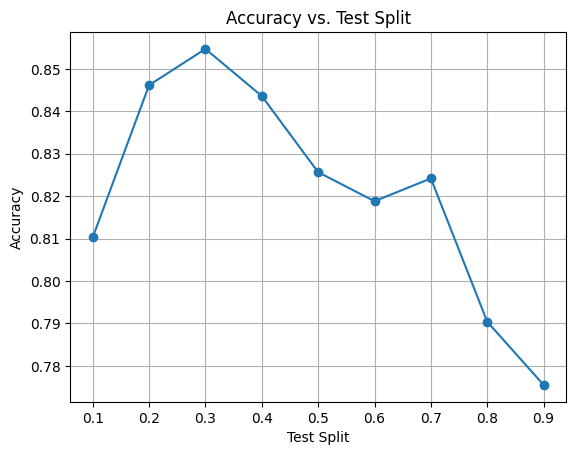

In [ ]:
plt.plot(splits, accuracies, marker='o')
plt.xlabel('Test Split')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Test Split')
plt.grid(True)
plt.show()

#Bernoulli Naive Bayes

In [ ]:
accuracies = []

for test_split_ratio in splits:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_split_ratio, random_state=2)

    model = BernoulliNB()

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Train-Test split ratio: {(1-test_split_ratio)*100:.1f}% - {test_split_ratio*100:.1f}%")
    print(f"Accuracy: {accuracy}")
    accuracies.append(accuracy)

    print("\nClassification Report:\n", classification_report(y_test, y_pred))

avg_accuracy = np.mean(accuracies)

model_accuracies["Bernoulli NB"] = [avg_accuracy]

Train-Test split ratio: 90.0% - 10.0%
Accuracy: 0.6461538461538462

Classification Report:
               precision    recall  f1-score   support

        F_AI       0.71      0.66      0.68        44
      F_REAL       0.58      0.64      0.61        44
        M_AI       0.62      0.67      0.64        51
      M_REAL       0.69      0.62      0.65        56

    accuracy                           0.65       195
   macro avg       0.65      0.65      0.65       195
weighted avg       0.65      0.65      0.65       195

Train-Test split ratio: 80.0% - 20.0%
Accuracy: 0.6871794871794872

Classification Report:
               precision    recall  f1-score   support

        F_AI       0.76      0.70      0.73        98
      F_REAL       0.62      0.72      0.67        87
        M_AI       0.63      0.68      0.66        97
      M_REAL       0.74      0.65      0.69       108

    accuracy                           0.69       390
   macro avg       0.69      0.69      0.69       390
w

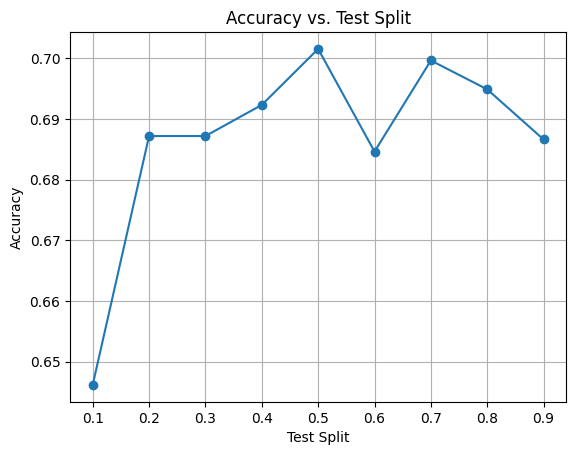

In [ ]:
plt.plot(splits, accuracies, marker='o')
plt.xlabel('Test Split')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Test Split')
plt.grid(True)
plt.show()

#Logistic Regression

In [ ]:
accuracies = []
for test_split_ratio in splits:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_split_ratio, random_state=2)

  logreg = LogisticRegression(random_state=16, max_iter=10000)

  # fit the model with data
  logreg.fit(X_train, y_train)

  y_pred = logreg.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  print(f"Train-Test split ratio: {(1-test_split_ratio)*100:.1f}% - {test_split_ratio*100:.1f}%")
  print(f"Accuracy: {accuracy}")
  accuracies.append(accuracy)
  print("\nClassification Report:\n", classification_report(y_test, y_pred))

avg_accuracy = np.mean(accuracies)

model_accuracies["LogReg"] = [avg_accuracy]

Train-Test split ratio: 90.0% - 10.0%
Accuracy: 0.764102564102564

Classification Report:
               precision    recall  f1-score   support

        F_AI       0.72      0.75      0.73        44
      F_REAL       0.78      0.70      0.74        44
        M_AI       0.76      0.73      0.74        51
      M_REAL       0.80      0.86      0.83        56

    accuracy                           0.76       195
   macro avg       0.76      0.76      0.76       195
weighted avg       0.76      0.76      0.76       195

Train-Test split ratio: 80.0% - 20.0%
Accuracy: 0.7871794871794872

Classification Report:
               precision    recall  f1-score   support

        F_AI       0.78      0.80      0.79        98
      F_REAL       0.77      0.75      0.76        87
        M_AI       0.78      0.76      0.77        97
      M_REAL       0.81      0.83      0.82       108

    accuracy                           0.79       390
   macro avg       0.79      0.78      0.79       390
we

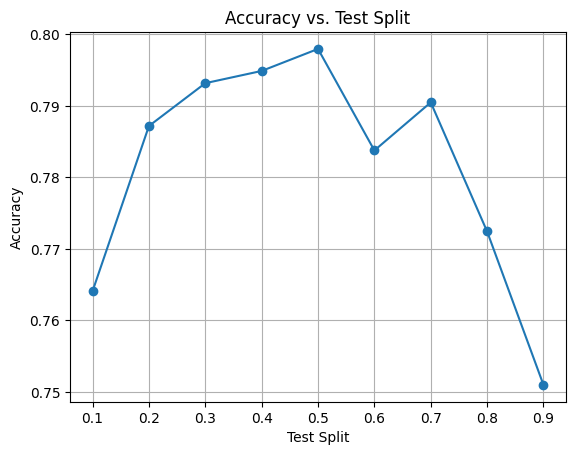

In [ ]:
plt.plot(splits, accuracies, marker='o')
plt.xlabel('Test Split')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Test Split')
plt.grid(True)
plt.show()

#Linear Discriminant Analysis

In [ ]:
accuracies = []

for test_split_ratio in splits:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_split_ratio, random_state=2)

    model = LinearDiscriminantAnalysis()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Train-Test split ratio: {(1-test_split_ratio)*100:.1f}% - {test_split_ratio*100:.1f}%")
    print(f"Accuracy: {accuracy}")
    accuracies.append(accuracy)

    print("\nClassification Report:\n", classification_report(y_test, y_pred))

avg_accuracy = np.mean(accuracies)

model_accuracies["Linear Discriminant"] = [avg_accuracy]

Train-Test split ratio: 90.0% - 10.0%
Accuracy: 0.7589743589743589

Classification Report:
               precision    recall  f1-score   support

        F_AI       0.72      0.70      0.71        44
      F_REAL       0.78      0.70      0.74        44
        M_AI       0.75      0.76      0.76        51
      M_REAL       0.78      0.84      0.81        56

    accuracy                           0.76       195
   macro avg       0.76      0.75      0.75       195
weighted avg       0.76      0.76      0.76       195

Train-Test split ratio: 80.0% - 20.0%
Accuracy: 0.8

Classification Report:
               precision    recall  f1-score   support

        F_AI       0.81      0.80      0.80        98
      F_REAL       0.77      0.77      0.77        87
        M_AI       0.80      0.81      0.81        97
      M_REAL       0.81      0.81      0.81       108

    accuracy                           0.80       390
   macro avg       0.80      0.80      0.80       390
weighted avg    

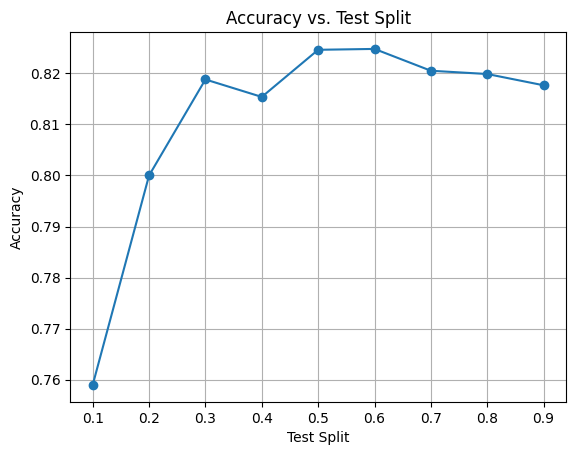

In [ ]:
plt.plot(splits, accuracies, marker='o')
plt.xlabel('Test Split')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Test Split')
plt.grid(True)
plt.show()

#Random Forest

In [ ]:
accuracies = []
for test_split_ratio in splits:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_split_ratio, random_state=2)

  model = RandomForestClassifier(n_estimators=100, random_state=42)
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  print(f"Train-Test split ratio: {(1-test_split_ratio)*100:.1f}% - {test_split_ratio*100:.1f}%")
  print(f"Accuracy: {accuracy}")
  accuracies.append(accuracy)
  print("\nClassification Report:\n", classification_report(y_test, y_pred))

avg_accuracy = np.mean(accuracies)

model_accuracies["Random Forest"] = [avg_accuracy]

Train-Test split ratio: 90.0% - 10.0%
Accuracy: 0.9076923076923077

Classification Report:
               precision    recall  f1-score   support

        F_AI       0.80      0.91      0.85        44
      F_REAL       0.93      0.98      0.96        44
        M_AI       0.91      0.80      0.85        51
      M_REAL       0.98      0.95      0.96        56

    accuracy                           0.91       195
   macro avg       0.91      0.91      0.91       195
weighted avg       0.91      0.91      0.91       195

Train-Test split ratio: 80.0% - 20.0%
Accuracy: 0.9025641025641026

Classification Report:
               precision    recall  f1-score   support

        F_AI       0.83      0.92      0.87        98
      F_REAL       0.91      0.95      0.93        87
        M_AI       0.91      0.81      0.86        97
      M_REAL       0.96      0.93      0.94       108

    accuracy                           0.90       390
   macro avg       0.90      0.90      0.90       390
w

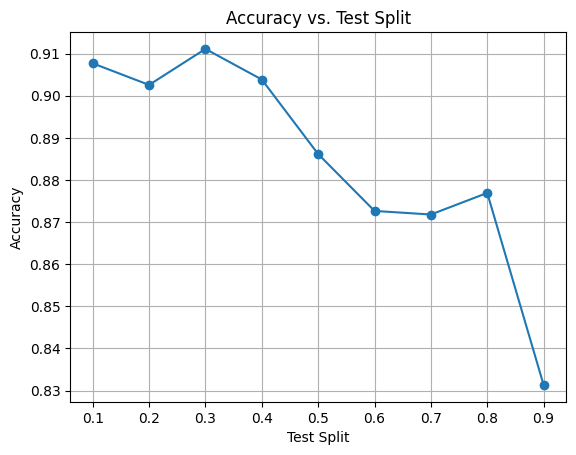

In [ ]:
plt.plot(splits, accuracies, marker='o')
plt.xlabel('Test Split')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Test Split')
plt.grid(True)
plt.show()

#Decision Tree Classifier

In [ ]:
accuracies = []

for test_split_ratio in splits:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_split_ratio, random_state=2)

  model = DecisionTreeClassifier(random_state=42)
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  print(f"Train-Test split ratio: {(1-test_split_ratio)*100:.1f}% - {test_split_ratio*100:.1f}%")
  print(f"Accuracy: {accuracy}")
  accuracies.append(accuracy)

  print("\nClassification Report:\n", classification_report(y_test, y_pred))

avg_accuracy = np.mean(accuracies)

model_accuracies["Decision Trees"] = [avg_accuracy]

Train-Test split ratio: 90.0% - 10.0%
Accuracy: 0.7897435897435897

Classification Report:
               precision    recall  f1-score   support

        F_AI       0.72      0.75      0.73        44
      F_REAL       0.78      0.86      0.82        44
        M_AI       0.77      0.71      0.73        51
      M_REAL       0.89      0.84      0.86        56

    accuracy                           0.79       195
   macro avg       0.79      0.79      0.79       195
weighted avg       0.79      0.79      0.79       195

Train-Test split ratio: 80.0% - 20.0%
Accuracy: 0.8076923076923077

Classification Report:
               precision    recall  f1-score   support

        F_AI       0.76      0.83      0.79        98
      F_REAL       0.82      0.79      0.81        87
        M_AI       0.79      0.74      0.77        97
      M_REAL       0.86      0.86      0.86       108

    accuracy                           0.81       390
   macro avg       0.81      0.81      0.81       390
w

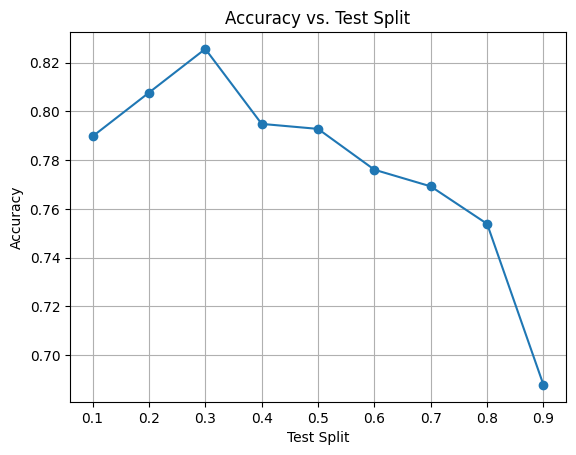

In [ ]:
plt.plot(splits, accuracies, marker='o')
plt.xlabel('Test Split')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Test Split')
plt.grid(True)
plt.show()

#Gradient Boosting Classifier


In [ ]:
accuracies = []

for test_split_ratio in splits:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_split_ratio, random_state=2)

  model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.2, random_state=42)
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  print(f"Train-Test split ratio: {(1-test_split_ratio)*100:.1f}% - {test_split_ratio*100:.1f}%")
  print(f"Accuracy: {accuracy}")
  accuracies.append(accuracy)

  print("\nClassification Report:\n", classification_report(y_test, y_pred))

avg_accuracy = np.mean(accuracies)

model_accuracies["Gradient Boosting"] = [avg_accuracy]

Train-Test split ratio: 90.0% - 10.0%
Accuracy: 0.9179487179487179

Classification Report:
               precision    recall  f1-score   support

        F_AI       0.80      0.93      0.86        44
      F_REAL       0.95      0.95      0.95        44
        M_AI       0.95      0.80      0.87        51
      M_REAL       0.96      0.98      0.97        56

    accuracy                           0.92       195
   macro avg       0.92      0.92      0.92       195
weighted avg       0.92      0.92      0.92       195

Train-Test split ratio: 80.0% - 20.0%
Accuracy: 0.9179487179487179

Classification Report:
               precision    recall  f1-score   support

        F_AI       0.86      0.93      0.89        98
      F_REAL       0.94      0.94      0.94        87
        M_AI       0.92      0.85      0.88        97
      M_REAL       0.95      0.95      0.95       108

    accuracy                           0.92       390
   macro avg       0.92      0.92      0.92       390
w

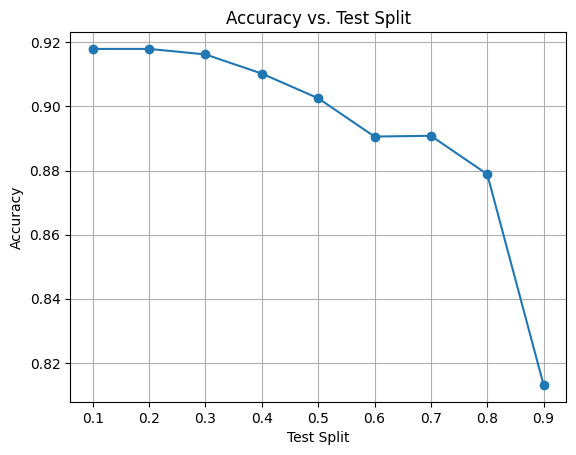

In [ ]:
plt.plot(splits, accuracies, marker='o')
plt.xlabel('Test Split')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Test Split')
plt.grid(True)
plt.show()

#Extra Trees Classifier

In [ ]:
accuracies = []

for test_split_ratio in splits:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_split_ratio, random_state=2)

  model = ExtraTreesClassifier(n_estimators=450, random_state=42)
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  print(f"Train-Test split ratio: {(1-test_split_ratio)*100:.1f}% - {test_split_ratio*100:.1f}%")
  print(f"Accuracy: {accuracy}")
  accuracies.append(accuracy)

  print("\nClassification Report:\n", classification_report(y_test, y_pred))

avg_accuracy = np.mean(accuracies)

model_accuracies["Extra Trees"] = [avg_accuracy]

#save model for deployment
model = ExtraTreesClassifier(n_estimators=450, random_state=42)
model.fit(X, y)
joblib.dump(model, 'extra_trees_model.pkl')

Train-Test split ratio: 90.0% - 10.0%
Accuracy: 0.9282051282051282

Classification Report:
               precision    recall  f1-score   support

        F_AI       0.80      0.93      0.86        44
      F_REAL       1.00      0.98      0.99        44
        M_AI       0.93      0.80      0.86        51
      M_REAL       0.98      1.00      0.99        56

    accuracy                           0.93       195
   macro avg       0.93      0.93      0.93       195
weighted avg       0.93      0.93      0.93       195

Train-Test split ratio: 80.0% - 20.0%
Accuracy: 0.9153846153846154

Classification Report:
               precision    recall  f1-score   support

        F_AI       0.83      0.91      0.87        98
      F_REAL       0.97      0.97      0.97        87
        M_AI       0.90      0.81      0.85        97
      M_REAL       0.97      0.97      0.97       108

    accuracy                           0.92       390
   macro avg       0.92      0.92      0.92       390
w

['extra_trees_model.pkl']

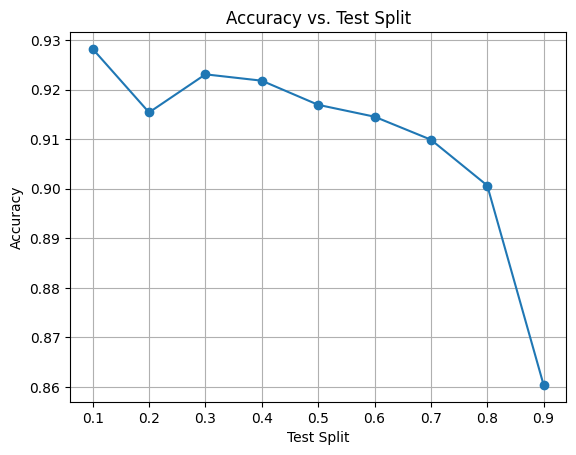

In [ ]:
plt.plot(splits, accuracies, marker='o')
plt.xlabel('Test Split')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Test Split')
plt.grid(True)
plt.show()

#XGBClassifier

In [ ]:
accuracies = []

for test_split_ratio in splits:
  X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=test_split_ratio, random_state=2)

  model = XGBClassifier(n_estimators=200, learning_rate=0.1, random_state=42, use_label_encoder=False)
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  print(f"Train-Test split ratio: {(1-test_split_ratio)*100:.1f}% - {test_split_ratio*100:.1f}%")
  print(f"Accuracy: {accuracy}")
  accuracies.append(accuracy)

  print("\nClassification Report:\n", classification_report(y_test, y_pred))

avg_accuracy = np.mean(accuracies)

model_accuracies["XGB"] = [avg_accuracy]

Train-Test split ratio: 90.0% - 10.0%
Accuracy: 0.9179487179487179

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.93      0.87        44
           1       0.93      0.98      0.96        44
           2       0.93      0.80      0.86        51
           3       0.98      0.96      0.97        56

    accuracy                           0.92       195
   macro avg       0.92      0.92      0.92       195
weighted avg       0.92      0.92      0.92       195

Train-Test split ratio: 80.0% - 20.0%
Accuracy: 0.9358974358974359

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91        98
           1       0.95      0.97      0.96        87
           2       0.93      0.87      0.90        97
           3       0.97      0.97      0.97       108

    accuracy                           0.94       390
   macro avg       0.94      0.94      0.94       390
w

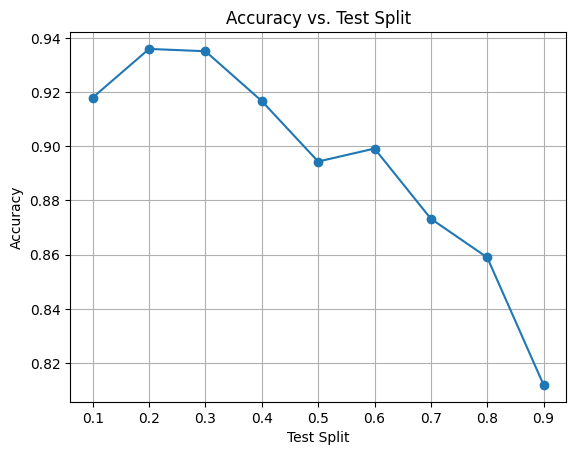

In [ ]:
plt.plot(splits, accuracies, marker='o')
plt.xlabel('Test Split')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Test Split')
plt.grid(True)
plt.show()

#LightGBM Classifier


In [ ]:
accuracies = []

for test_split_ratio in splits:
  X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=test_split_ratio, random_state=2)

  model = LGBMClassifier(n_estimators=200, learning_rate=0.1, random_state=42, verbosity=-1)
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  print(f"Train-Test split ratio: {(1-test_split_ratio)*100:.1f}% - {test_split_ratio*100:.1f}%")
  print(f"Accuracy: {accuracy}")
  accuracies.append(accuracy)

  print("\nClassification Report:\n", classification_report(y_test, y_pred))

avg_accuracy = np.mean(accuracies)

model_accuracies["LightGBM"] = [avg_accuracy]

Train-Test split ratio: 90.0% - 10.0%
Accuracy: 0.9384615384615385

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.98      0.90        44
           1       0.98      0.98      0.98        44
           2       0.98      0.82      0.89        51
           3       0.98      0.98      0.98        56

    accuracy                           0.94       195
   macro avg       0.94      0.94      0.94       195
weighted avg       0.94      0.94      0.94       195

Train-Test split ratio: 80.0% - 20.0%
Accuracy: 0.9384615384615385

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92        98
           1       0.95      0.97      0.96        87
           2       0.93      0.87      0.90        97
           3       0.98      0.97      0.98       108

    accuracy                           0.94       390
   macro avg       0.94      0.94      0.94       390
w

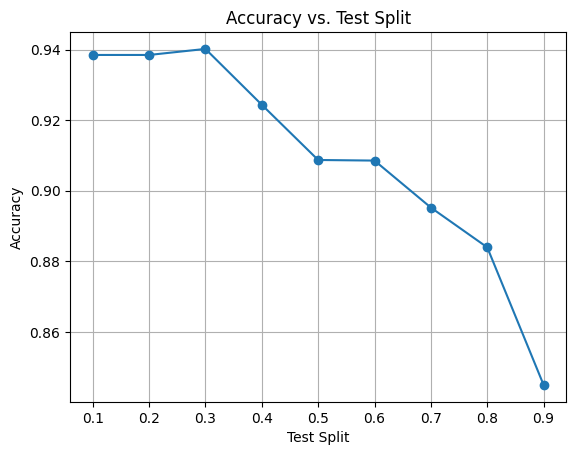

In [ ]:
plt.plot(splits, accuracies, marker='o')
plt.xlabel('Test Split')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Test Split')
plt.grid(True)
plt.show()

#CatBoost Classifier

In [ ]:
accuracies = []

for test_split_ratio in splits:
  X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=test_split_ratio, random_state=2)

  model = CatBoostClassifier(n_estimators=200, learning_rate=0.1, random_state=42, verbose=0)
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  print(f"Train-Test split ratio: {(1-test_split_ratio)*100:.1f}% - {test_split_ratio*100:.1f}%")
  print(f"Accuracy: {accuracy}")
  accuracies.append(accuracy)

  print("\nClassification Report:\n", classification_report(y_test, y_pred))

avg_accuracy = np.mean(accuracies)

model_accuracies["CatBoost"] = [avg_accuracy]

Train-Test split ratio: 90.0% - 10.0%
Accuracy: 0.9076923076923077

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.91      0.84        44
           1       0.94      1.00      0.97        44
           2       0.91      0.76      0.83        51
           3       1.00      0.96      0.98        56

    accuracy                           0.91       195
   macro avg       0.91      0.91      0.91       195
weighted avg       0.91      0.91      0.91       195

Train-Test split ratio: 80.0% - 20.0%
Accuracy: 0.9179487179487179

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87        98
           1       0.96      0.99      0.97        87
           2       0.90      0.81      0.85        97
           3       0.99      0.96      0.98       108

    accuracy                           0.92       390
   macro avg       0.92      0.92      0.92       390
w

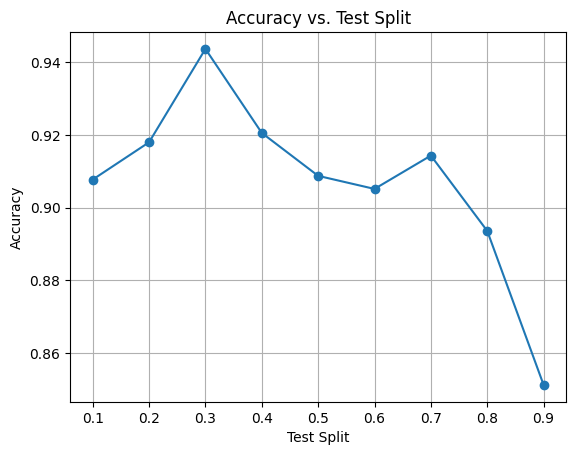

In [ ]:
plt.plot(splits, accuracies, marker='o')
plt.xlabel('Test Split')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Test Split')
plt.grid(True)
plt.show()

#SVM

In [ ]:
accuracies = []

for test_split_ratio in splits:
  X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=test_split_ratio, random_state=2)

  model = SVC(kernel='rbf', random_state=42)  # You can change kernel to 'rbf', 'poly', etc.
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  print(f"Train-Test split ratio: {(1-test_split_ratio)*100:.1f}% - {test_split_ratio*100:.1f}%")
  print(f"Accuracy: {accuracy}")
  accuracies.append(accuracy)

  print("\nClassification Report:\n", classification_report(y_test, y_pred))

avg_accuracy = np.mean(accuracies)

model_accuracies["SVM"] = [avg_accuracy]

Train-Test split ratio: 90.0% - 10.0%
Accuracy: 0.8666666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.80      0.76        44
           1       0.98      0.93      0.95        44
           2       0.79      0.75      0.77        51
           3       0.96      0.98      0.97        56

    accuracy                           0.87       195
   macro avg       0.87      0.86      0.86       195
weighted avg       0.87      0.87      0.87       195

Train-Test split ratio: 80.0% - 20.0%
Accuracy: 0.8846153846153846

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.82        98
           1       0.95      0.93      0.94        87
           2       0.82      0.80      0.81        97
           3       0.95      0.96      0.96       108

    accuracy                           0.88       390
   macro avg       0.89      0.88      0.88       390
w

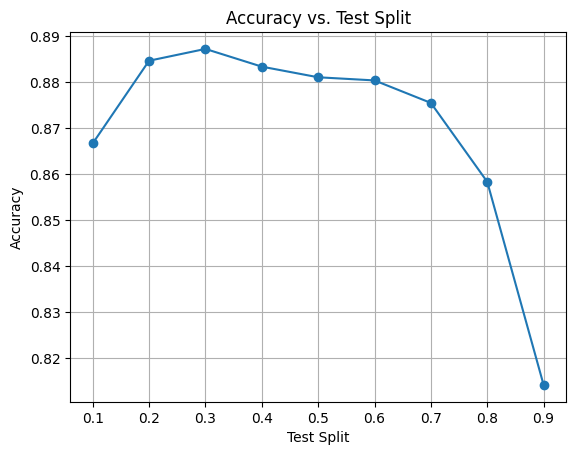

In [ ]:
plt.plot(splits, accuracies, marker='o')
plt.xlabel('Test Split')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Test Split')
plt.grid(True)
plt.show()

#Feedforward Neural Network

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=2)

base_model = Sequential([
    Dense(64, activation=None, input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),

    Dense(32, activation=None),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),

    Dense(16, activation=None),
    BatchNormalization(),
    Activation('relu'),

    Dense(9, activation=None),
    BatchNormalization(),
    Activation('relu'),

    Dense(4, activation='softmax')
])

base_model.compile(optimizer=Adam(learning_rate=0.005),
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

history = base_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=64, verbose=0)

loss, accuracy = base_model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

predictions = base_model.predict(X_test)
predicted_classes = tf.argmax(predictions, axis=1).numpy()

avg_accuracy = accuracy
model_accuracies["Feed Forward NN"] = [avg_accuracy]


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9228 - loss: 0.1795 
Test Loss: 0.1561, Test Accuracy: 0.9359
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


#RNN


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=2)

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

# Reshaping features data to 3D (samples, timesteps, features) for RNN
X_train_rnn = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_rnn = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

model = Sequential([
    SimpleRNN(64, activation=None, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])),
    BatchNormalization(),
    Activation('relu'),

    Dense(32, activation=None),
    BatchNormalization(),
    Activation('relu'),

    Dense(16, activation=None),
    BatchNormalization(),
    Activation('relu'),

    Dense(8, activation=None),
    BatchNormalization(),
    Activation('relu'),

    Dense(4, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_rnn, y_train, validation_data=(X_test_rnn, y_test), epochs=150, batch_size=64, verbose=0)

loss, accuracy = model.evaluate(X_test_rnn, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

predictions = model.predict(X_test_rnn)
predicted_classes = tf.argmax(predictions, axis=1).numpy()

avg_accuracy = accuracy
model_accuracies["RNN"] = [avg_accuracy]

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9120 - loss: 0.2652 
Test Loss: 0.2296, Test Accuracy: 0.9256
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


#All Model Performances

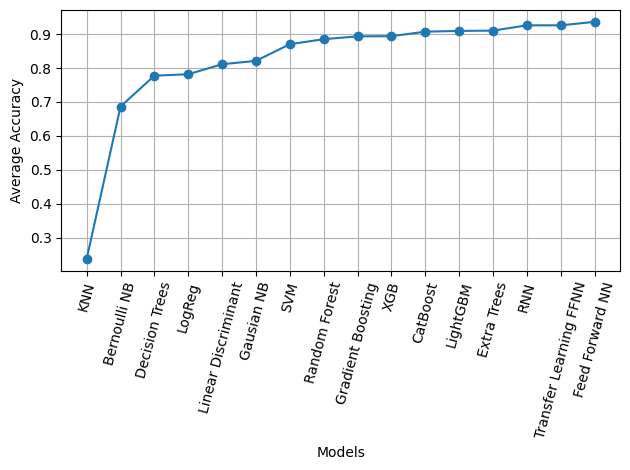

In [ ]:
avg_accuracies_sorted = {k: v for k, v in sorted(model_accuracies.items(), key=lambda item: item[1])}

keys = list(avg_accuracies_sorted.keys())
values = list(avg_accuracies_sorted.values())

plt.plot(keys, values, marker='o')
plt.xlabel("Models")
plt.ylabel("Average Accuracy")
plt.xticks(rotation=75)
plt.grid()
plt.tight_layout()
plt.show()

#Transfer Learning

In [ ]:
base_model.save("pretrained_ffnn.keras")
base_model = load_model("pretrained_ffnn.keras")

#last hidden layer is used and not last output layer as hidden layer has more information useful in transfer learning, whereas last layer only has the outputs.
base_model_last_hidden_layer = base_model.layers[-2].output

inputs = Input(shape=(base_model_last_hidden_layer.shape[1],))

x = base_model(inputs)  # The Sequential pre trained model will act as the first layer here
x = Dense(16, activation=None)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.2)(x)

x = Dense(32, activation=None)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.2)(x)

x = Dense(64, activation=None)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.2)(x)

x = Dense(32, activation=None)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Dense(16, activation=None)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Dense(8, activation=None)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Dense(4, activation='softmax')(x)

transfer_model = Model(inputs=inputs, outputs=x)

# Freeze the base model (so it doesn't get retrained)
for layer in base_model.layers:
    layer.trainable = False

transfer_model.compile(optimizer=Adam(learning_rate=0.001),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

transfer_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=64, verbose=0)

loss, accuracy = transfer_model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

predictions = transfer_model.predict(X_test)
predicted_classes = tf.argmax(predictions, axis=1).numpy()

avg_accuracy = accuracy
model_accuracies["Transfer Learning FFNN"] = [avg_accuracy]


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9039 - loss: 0.2576 
Test Loss: 0.2283, Test Accuracy: 0.9256
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


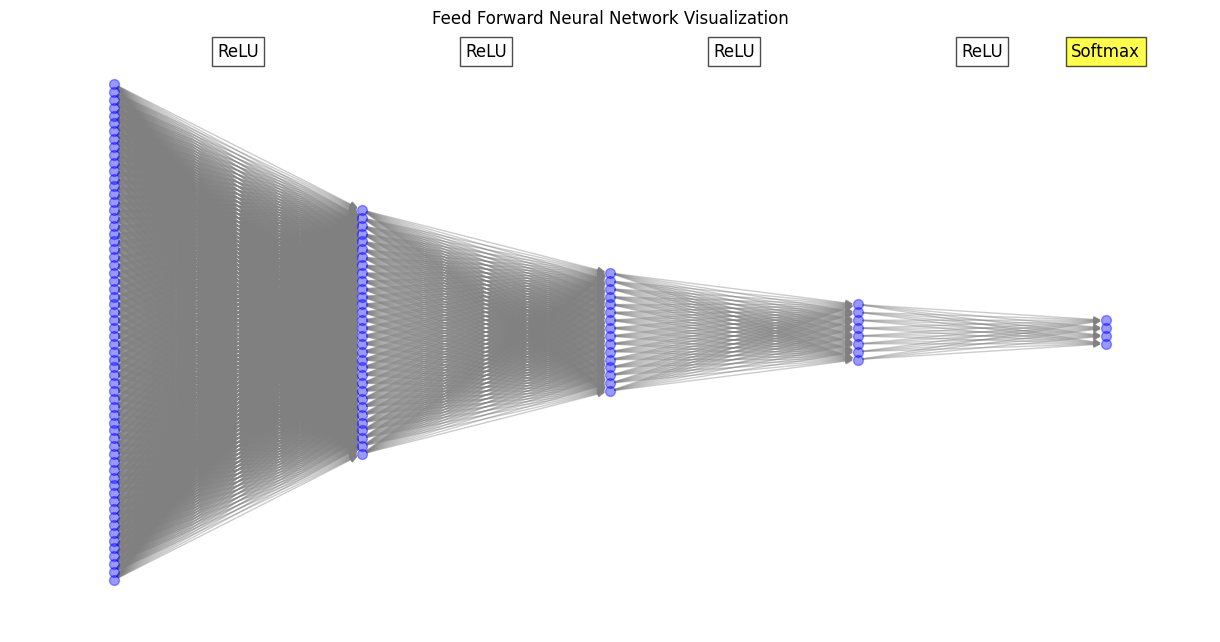

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_ffnn(layer_sizes, activations):
    G = nx.DiGraph()  # Directed graph for connections
    pos = {}  # Store positions for plotting
    neuron_spacing = max(layer_sizes)  # Determines vertical spacing

    # Create nodes and positions
    for layer_idx, num_neurons in enumerate(layer_sizes):
        y_positions = range(-num_neurons, num_neurons, 2)  # Spread neurons vertically
        for neuron_idx, y in enumerate(y_positions):
            node_name = f"L{layer_idx}N{neuron_idx}"
            G.add_node(node_name, layer=layer_idx)
            pos[node_name] = (layer_idx, y)

    # Create edges (fully connected layers)
    for layer_idx in range(len(layer_sizes) - 1):
        layer1 = [n for n in G.nodes if G.nodes[n]["layer"] == layer_idx]
        layer2 = [n for n in G.nodes if G.nodes[n]["layer"] == layer_idx + 1]

        for node1 in layer1:
            for node2 in layer2:
                G.add_edge(node1, node2)

    # Plot the neural network
    plt.figure(figsize=(12, 6))
    nx.draw(G, pos, with_labels=False, node_size=50, edge_color="gray", alpha=0.4, node_color="blue")

    # Add activation function text between layers
    for layer_idx in range(len(layer_sizes) - 1):  # Between hidden layers
        x = (layer_idx + layer_idx + 1) / 2  # Midpoint between layers
        plt.text(x, neuron_spacing + 5, activations[layer_idx], fontsize=12, ha='center',
                 bbox=dict(facecolor='white', alpha=0.7))

    # Add activation for the last output layer separately
    output_x = len(layer_sizes) - 1  # Last layer position
    plt.text(output_x, neuron_spacing + 5, activations[-1], fontsize=12, ha='center',
             bbox=dict(facecolor='yellow', alpha=0.7))  # Highlighted for visibility

    plt.title("Feed Forward Neural Network Visualization")
    plt.show()

# Define layer sizes and activation functions
layer_sizes = [64, 32, 16, 8, 4]
activations = ["ReLU", "ReLU", "ReLU", "ReLU", "Softmax"]  # Activation for each layer transition

# Plot the FFNN
plot_ffnn(layer_sizes, activations)


#Saving Model for Deployment

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping


base_model = Sequential([
    Dense(64, activation=None, input_shape=(X.shape[1],)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),

    Dense(32, activation=None),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),

    Dense(16, activation=None),
    BatchNormalization(),
    Activation('relu'),

    Dense(9, activation=None),
    BatchNormalization(),
    Activation('relu'),

    Dense(4, activation='softmax')
])

base_model.compile(optimizer=Adam(learning_rate=1e-4),
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

history = base_model.fit(X, y_encoded, epochs=100, batch_size=64, verbose=0)

base_model.save("base_model.keras")
base_model = load_model("base_model.keras")

# Freeze the base model (so it doesn't get retrained)
for layer in base_model.layers:
    layer.trainable = False


#Transfer Learning
base_model_last_hidden_layer = base_model.layers[-4].output

inputs = Input(shape=(base_model_last_hidden_layer.shape[1],))

x = base_model(inputs)
x = Dense(16, activation=None)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.2)(x)

x = Dense(32, activation=None)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.2)(x)

x = Dense(64, activation=None)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.2)(x)

x = Dense(32, activation=None)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Dense(16, activation=None)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Dense(8, activation=None)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Dense(4, activation='softmax')(x)

transfer_model = Model(inputs=inputs, outputs=x)

transfer_model.compile(optimizer=Adam(learning_rate=1e-4),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


transfer_model.fit(X, y_encoded, epochs=100, batch_size=64, callbacks=[early_stop], verbose=0)

transfer_model.save("transfer_learning_model.keras")